#Task one solution

In [19]:
import pandas as pd
import numpy as np
import seaborn as sb

from itertools import combinations
from scipy import stats
from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
#importing dataset from github repository
data = pd.read_csv('https://raw.githubusercontent.com/mohitnain6/Lannet_assignment/master/data.csv')
data.head()



,Date_1,Date_2,Date_3,Date_4,Date_5,Date_6,Date_7
0,1/17/2017,2019-10-25,28-Dec-18,10/9/2019,01/31/20,4/3/2017,08/22/18
1,9/8/2019,2016-08-16,2-Mar-19,3/23/2020,11/01/19,11/28/2018,01/07/19
2,7/7/2016,2016-11-29,1-Aug-19,2/11/2017,04/26/19,5/11/2017,01/07/18
3,5/8/2016,2019-03-25,11-Jun-18,12/13/2017,03/08/17,4/26/2019,09/24/18
4,2/25/2019,2017-06-13,20-Feb-18,2/28/2017,08/03/17,10/24/2018,10/05/17


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date_1  39 non-null     object
 1   Date_2  39 non-null     object
 2   Date_3  39 non-null     object
 3   Date_4  39 non-null     object
 4   Date_5  39 non-null     object
 5   Date_6  39 non-null     object
 6   Date_7  39 non-null     object
dtypes: object(7)
memory usage: 2.4+ KB


In [22]:
#function to convert coulumn into datetime object

def ConvertDatetime(data):
  df = data.copy() #Copy data to not modify orignal data
  for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col],errors = 'coerce')  # Converting all object columns in copied dataframe to datetime columns and fillinf with NaT if error occurs 
        except ValueError:
            pass
  for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
      df[col] = df[col].apply(lambda x: x if not pd.isnull(x) else None) #Converting NaT values to None for easier removal of columns
    if df[col].isnull().sum() == len(df[col]):
      df.drop(col,inplace=True,axis=1) #Drop columns if all values are None --> If column has no Dates
  return df #returning the modified copy of our data

In [23]:
def MakeDifference(data):
  df=ConvertDatetime(data) #Gets modified copy of our data
  for col in df.columns:
    data[col] = df[col] #Changes the columns of our original data to datetime columns if they have dates present
  date_columns=[]
  for col in data.columns:
    if data[col].dtype == 'datetime64[ns]':
      date_columns.append(col)  ## make a list of columns that are datetime
  date_combo = list(combinations(date_columns,2)) # make all possible pairs from our datetime columns
  for columns in date_combo:
    data['{}-{}'.format(columns[0],columns[1])] = data[columns[0]] - data[columns[1]] # Appending a difference column to our dataframe
MakeDifference(data)

In [24]:
data.head() #To check final require results

,Date_1,Date_2,Date_3,Date_4,Date_5,Date_6,Date_7,Date_1-Date_2,Date_1-Date_3,Date_1-Date_4,Date_1-Date_5,Date_1-Date_6,Date_1-Date_7,Date_2-Date_3,Date_2-Date_4,Date_2-Date_5,Date_2-Date_6,Date_2-Date_7,Date_3-Date_4,Date_3-Date_5,Date_3-Date_6,Date_3-Date_7,Date_4-Date_5,Date_4-Date_6,Date_4-Date_7,Date_5-Date_6,Date_5-Date_7,Date_6-Date_7
0,2017-01-17,2019-10-25,2018-12-28,2019-10-09,2020-01-31,2017-04-03,2018-08-22,-1011 days,-710 days,-995 days,-1109 days,-76 days,-582 days,301 days,16 days,-98 days,935 days,429 days,-285 days,-399 days,634 days,128 days,-114 days,919 days,413 days,1033 days,527 days,-506 days
1,2019-09-08,2016-08-16,2019-03-02,2020-03-23,2019-11-01,2018-11-28,2019-01-07,1118 days,190 days,-197 days,-54 days,284 days,244 days,-928 days,-1315 days,-1172 days,-834 days,-874 days,-387 days,-244 days,94 days,54 days,143 days,481 days,441 days,338 days,298 days,-40 days
2,2016-07-07,2016-11-29,2019-08-01,2017-02-11,2019-04-26,2017-05-11,2018-01-07,-145 days,-1120 days,-219 days,-1023 days,-308 days,-549 days,-975 days,-74 days,-878 days,-163 days,-404 days,901 days,97 days,812 days,571 days,-804 days,-89 days,-330 days,715 days,474 days,-241 days
3,2016-05-08,2019-03-25,2018-06-11,2017-12-13,2017-03-08,2019-04-26,2018-09-24,-1051 days,-764 days,-584 days,-304 days,-1083 days,-869 days,287 days,467 days,747 days,-32 days,182 days,180 days,460 days,-319 days,-105 days,280 days,-499 days,-285 days,-779 days,-565 days,214 days
4,2019-02-25,2017-06-13,2018-02-20,2017-02-28,2017-08-03,2018-10-24,2017-10-05,622 days,370 days,727 days,571 days,124 days,508 days,-252 days,105 days,-51 days,-498 days,-114 days,357 days,201 days,-246 days,138 days,-156 days,-603 days,-219 days,-447 days,-63 days,384 days


#Task two solution

In [15]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mohitnain6/databucket/master/WHO.csv')
dataset.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2


In [33]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      194 non-null    object 
 1   Region                       194 non-null    object 
 2   Population                   194 non-null    int64  
 3   Under15                      194 non-null    float64
 4   Over60                       194 non-null    float64
 5   LifeExpectancy               194 non-null    int64  
 6   ChildMortality               194 non-null    float64
 7   CellularSubscribers          194 non-null    float64
 8   LiteracyRate                 194 non-null    float64
 9   GNI                          194 non-null    int64  
 10  PrimarySchoolEnrollmentMale  194 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 16.8+ KB


(194, 11)

In [18]:
pearsoncorr = dataset.corr(method='pearson')
pearsoncorr

,Population,Under15,Over60,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale
Population,1.000000,-0.059634,0.011693,0.016277,-0.003675,-0.024026,-0.015937,-0.000142,-0.114835
Under15,-0.059634,1.000000,-0.829390,-0.836467,0.815076,-0.547105,0.003367,-0.579848,-0.153362
Over60,0.011693,-0.829390,1.000000,0.688129,-0.624303,0.387947,-0.043209,0.551694,0.238386
LifeExpectancy,0.016277,-0.836467,0.688129,1.000000,-0.924564,0.532386,-0.072008,0.554708,0.210041
ChildMortality,-0.003675,0.815076,-0.624303,-0.924564,1.000000,-0.530916,-0.005560,-0.452838,-0.160772
CellularSubscribers,-0.024026,-0.547105,0.387947,0.532386,-0.530916,1.000000,0.142985,0.418035,0.195088
LiteracyRate,-0.015937,0.003367,-0.043209,-0.072008,-0.005560,0.142985,1.000000,-0.080018,0.071562
GNI,-0.000142,-0.579848,0.551694,0.554708,-0.452838,0.418035,-0.080018,1.000000,0.234743
PrimarySchoolEnrollmentMale,-0.114835,-0.153362,0.238386,0.210041,-0.160772,0.195088,0.071562,0.234743,1.000000


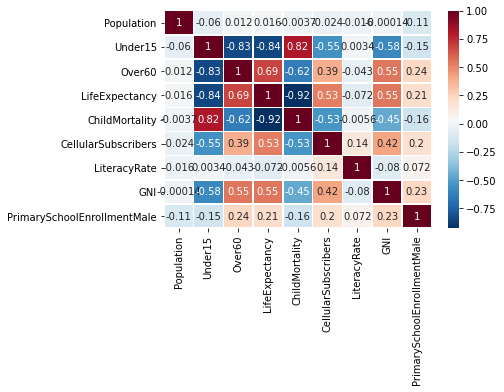

In [30]:
#ploting peaeson correlation heatmap to see corelation between different columns
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [71]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr(method='pearson')
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x.shape

In [72]:
threshold = 0.85 
remove_collinear_features(dataset, threshold)

ChildMortality | LifeExpectancy | 0.92


(194, 10)

#Hense columns having Pearson correlation more than 0.85